# Causal inference model for auditory-visual duration discrimination with conflict

# Notations:
- $S_a$: true auditory duration
- $S_v$: true visual duration
- $m_a$: noisy auditory measurement
- $m_v$: noisy visual measurement
- $\sigma_a$: auditory noise (standard deviation)
- $\sigma_v$: visual noise (standard deviation)
- $C$: common cause (1 if common, 2 if independent)
- $\mu_p$: prior bias (assumed to be 0 for simplicity)
- $\sigma_p$: prior noise (assumed to be infinite for simplicity)
- $\sigma_{av,a}$: effective auditory noise in the AV condition
- $\sigma_{av,v}$: effective visual noise in the AV condition
- $\hat{S}_{av,a}$: estimated auditory duration in the AV condition
- $\hat{S}_{av,v}$: estimated visual duration in the AV condition
- $\hat{S}_{CI,t}$: final internal estimate for the test interval
- $\hat{S}_{CI,s}$: final internal estimate for the standard interval



# 1 - Reliability based duration estimation assuming fully fusion


$\hat{S}_{av,a}=\hat{S}_{av,v}= \frac{\sigma_{av,a}^{-2} m_a+\sigma_{av,v}^{-2} m_v}{\sigma_{av,a}^{-2} + \sigma_{av,v}^{-2}}$ 

Here since my stimulus is a duration from observers perspective L(s|m) would not be exactly gaussian around stimulus. Because stimulus cant be negative and observation cant be negative as well. And the observation would depend on the stimulus duration longer durations most probably lead to higher noise. In order to solve this problem I think using a logarithmic gaussian or log of S would be better. What do you think



In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider, IntSlider
#import normal
from scipy.stats import norm

# unimodal measurements
from scipy.stats import truncnorm

def sigmaFlex(S,sigma, weber_k=0.2):
    return sigma * (1 + weber_k * S)

def unimodalMeasurements(sigma, S, n=500):
    # Define lower bound (0) and calculate the standardized lower bound for truncnorm
    a = (0 - S) / sigma
    b = np.inf  # no upper bound restriction
    m = truncnorm.rvs(a, b, loc=S, scale=sigma, size=n)
    return m

# probability density function of a Gaussian distribution
def gaussianPDF(x,S, sigma):
	return (1/(np.sqrt(2*np.pi)*sigma))*np.exp(-((x-S)**2)/(2*(sigma**2)))

# likelihood function
def likelihood( S, sigma):
    #S=np.log(S)  # convert S to log scale
    # P(m|s) # likelihood of measurements given the true duration
    m=np.linspace(0, S + 10*sigma, 500)
    #p_m=gaussianPDF(m,S,sigma) # calculate the probability density function
    # Alternatively, you can use scipy's norm.pdf for the same result
    p_m=norm.pdf(m, loc=S, scale=sigma) # uncomment
    return m, p_m

def plotLikelihood(S,sigma):
	x, p_x = likelihood(S, sigma)
	plt.plot(x, p_x, label='Likelihood Function')
	plt.xlabel('Hypothetical stimuli $S$')
	plt.ylabel('Probability Density')
	plt.title('Measurement distribution $p(m|s)$')
	plt.legend()

def plotMeasurements(sigma, S):
    m = unimodalMeasurements(sigma, S)
    plt.hist(m, bins=50, density=True, alpha=0.5, label='Measurements Histogram')
    plt.xlabel('Hypothetical stimuli $S$')
    plt.ylabel('Density')
    plt.title('Unimodal Measurements Histogram')
    plt.legend()      


def plotMeasurementsAndLikelihood(sigma, S):
    plt.figure(figsize=(10, 6))
    plotMeasurements(sigma, S)
    plotLikelihood(S, sigma)
    #plt.xlim(0, 1)

    plt.show()

# interactive plotting
import ipywidgets as widgets
interact(plotMeasurementsAndLikelihood,
         sigma=widgets.FloatSlider(value=0.2, min=0.1, max=5.0, step=0.01, description='Sigma'),
         S=widgets.FloatSlider(value=0.5, min=-1.5, max=2.5, step=0.02, description='True Duration S'))




interactive(children=(FloatSlider(value=0.2, description='Sigma', max=5.0, min=0.1, step=0.01), FloatSlider(va…

<function __main__.plotMeasurementsAndLikelihood(sigma, S)>

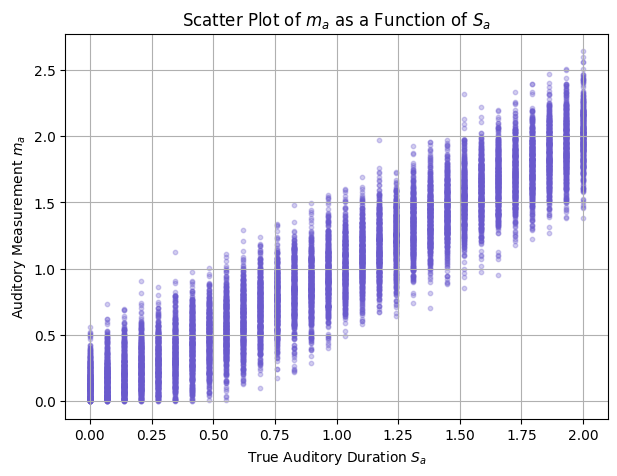

interactive(children=(FloatSlider(value=0.5, description='Measurement m0', max=2.5, step=0.01), FloatSlider(va…

<function __main__.plot_likelihood_S_given_m(m0, S_grid, sigma_a=0.2)>

In [2]:
# Scatter plot of m_a as a function of S_a
def scatterMeasurements_vs_Sa(sigma_a=0.2, n=500):
    S_a_values = np.linspace(-0, 2, 30)
    m_a_all = []
    S_a_all = []
    for S_a in S_a_values:
        m_a = unimodalMeasurements(sigma_a, S_a, n)
        S_a_all.extend([S_a]*n)
        m_a_all.extend(m_a)
    plt.figure(figsize=(7, 5))
    plt.scatter(S_a_all, m_a_all, alpha=0.3, s=10, color='slateblue')
    plt.xlabel('True Auditory Duration $S_a$')
    plt.ylabel('Auditory Measurement $m_a$')
    plt.title('Scatter Plot of $m_a$ as a Function of $S_a$')
    plt.grid(True)
    plt.show()

scatterMeasurements_vs_Sa()

# Plot PDF of measurements for a single S_a
def plot_measurement_pdf(S_a=1.0, sigma_a=0.2):
    m = np.random.normal(S_a, sigma_a, 100)
    pdf = norm.pdf(m, S_a, sigma_a)
    plt.figure(figsize=(7, 4))
    plt.scatter(m, pdf, color='crimson', label=f'PDF for $S_a$={S_a}')
    plt.xlabel('Auditory Measurement $m_a$')
    plt.ylabel('Probability Density')
    plt.title('PDF of $m_a$ for a Single $S_a$')
    plt.legend()
    plt.grid(True)
    plt.show()

#interact(plot_measurement_pdf, S_a=(0.0, 2.0, 0.1), sigma_a=(0.01, 1.0, 0.01))

def plot_likelihood_S_given_m(m0, S_grid, sigma_a=0.2):
    """Plot L(S | m0) for a single observed measurement m0."""
    likelihood = norm.pdf(m0, S_grid, sigma_a)   # same formula, S is now the variable
    plt.figure(figsize=(7,4))
    plt.plot(S_grid, likelihood, color='royalblue')
    plt.xlabel('Hypothesised stimulus $S_a$')
    plt.ylabel(r'Likelihood $L(S_a\mid m_0)$')
    plt.title(fr'Likelihood of $S_a$ given a single measurement $m_0={m0:.2f}$')
    plt.grid(True)
    plt.show()

interact(plot_likelihood_S_given_m, m0=FloatSlider(value=0.5, min=0, max=2.5, step=0.01, description='Measurement m0'),
            S_grid=widgets.fixed(np.linspace(0, 2.5, 100)),
            sigma_a=FloatSlider(value=0.2, min=0.01, max=1.0, step=0.01, description='Noise $\sigma_a$'))

### 2.1 Fusion (C=1)

### **2.1.1 Fusion of one interval**

$$\hat{S}_{av,a}=\hat{S}_{av,v}= \frac{\sigma_{av,a}^{-2} m_a+\sigma_{av,v}^{-2} m_v}{\sigma_{av,a}^{-2} + \sigma_{av,v}^{-2}}\\ 
= w_aS_a+w_vS_v$$ 
$$J_a=\frac{1}{\sigma_{av,a}^{2}} \\
J_v=\frac{1}{\sigma_{av,v}^{2}}\\
\sigma_{av}^2=\frac{1}{J_1+J_2}$$

$$p(S|m_a,m_v)\sim p(S)p(m_a|S)p(m_v|S)\\
p(S|m_a,m_v)\sim N(\hat S_{av},\sigma_{av}^2)\\
$$


In [3]:
# compute fused estimate (reliability weighted avg)
def fusionAV(sigmaAV_A,sigmaAV_V, S_a, visualConflict):
	m_a=unimodalMeasurements(sigmaAV_A, S_a)
	S_v=S_a+visualConflict
	m_v = unimodalMeasurements(sigmaAV_V,S_v)  # visual measurement
	# compute the precisons inverse of variances
	J_AV_A= sigmaAV_A**-2 # auditory precision
	J_AV_V=sigmaAV_V**-2 # visual precision
	# compute the fused estimate using reliability weighted averaging
	hat_S_AV= (J_AV_A*m_a+J_AV_V*m_v)/(J_AV_V+J_AV_A)
	sigma_S_AV_hat=np.sqrt(1 / (J_AV_A + J_AV_V))  # fused standard deviation

	return hat_S_AV, sigma_S_AV_hat


In [ ]:
# create interactive plot 
from ipywidgets import interact, FloatSlider, IntSlider
#import normal
from scipy.stats import norm

def generativeModelPlot(sigmaAV_A, sigmaAV_V, S_a,visualConflict,showHistograms=True):
    # Go analytic likelihoods
    # S: True Stim
    S_v=S_a+visualConflict
    # plot the likelihoods
    plt.figure(figsize=(10, 6))
    # line plot probablity distribution of auditory measurement
    colorA='teal'
    x_a,p_a = likelihood( S_a, sigmaAV_A) # probability density function for auditory measurement
    plt.plot(x_a, p_a, color=colorA, label='Auditory PDF')
    plt.axvline(S_a, color=colorA, label= "Auditory Stimulus", linestyle='--')

    # Plot measurements and true stimulus value for Visual
    x_v= np.linspace(S_v - 4*sigmaAV_V, S_v + 4*sigmaAV_V, 500)
    colorV='forestgreen'
    x_v,p_v=likelihood(S_v, sigmaAV_V) # args: mean, std and m_v means measurement
    plt.plot(x_v, p_v, color=colorV, label='Visual PDF')
    plt.axvline(S_v, color=colorV, label= "Visual Stimulus", linestyle='--')

    # Fused estimate
    hat_S_AV , sigma_S_AV_hat= fusionAV(sigmaAV_A, sigmaAV_V, S_a, visualConflict)
    plt.axvline(np.mean(hat_S_AV), color='orange', label='$\hat S_{av}$Fused Estimate', linestyle='--')
    
    # fused likelihood analytically
    J_a = sigmaAV_A**-2  # auditory precision
    J_v = sigmaAV_V**-2  # visual precision

    w_a = J_a / (J_a + J_v)  # weight for auditory
    w_v = 1 - w_a  # weight for visual
    mu_Shat = w_a * S_a + w_v * S_v  # fused mean
    
    x_av = np.linspace(mu_Shat - 4 * sigma_S_AV_hat, mu_Shat + 4 * sigma_S_AV_hat, 500)
    p_S_AV= gaussianPDF(x_av,mu_Shat,sigma_S_AV_hat)

    #x_av, p_S_AV = likelihood(mu_Shat, sigma_S_AV_hat)
    plt.plot(x_av, p_S_AV, color='orange', label=f'$S$ Fused PDF')
    plt.axvline(mu_Shat, color='orange', linestyle='--')

    # plot the measurements
    if showHistograms:
        plt.hist(unimodalMeasurements(sigmaAV_A, S_a), bins=30, density=True, alpha=0.5, color='teal')
        plt.hist(unimodalMeasurements(sigmaAV_V, S_v), bins=30, density=True, alpha=0.5, color='forestgreen')
        plt.hist(hat_S_AV, bins=30, density=True, alpha=0.5, color='orange' )
    plt.title('Generative Model for AV Fusion')
    plt.xlabel('Internal Measurement / Estimate')
    plt.ylabel('Probability Density')
    plt.legend(loc='best')
    #plt.tight_layout()
    plt.xlim(-1.5,1.5)

# Interactive Plotting
interact(generativeModelPlot,
         sigmaAV_A=widgets.FloatSlider(value=0.2, min=0.1, max=5.0, step=0.1, description='$Sigma_{AV,A}'),
         sigmaAV_V=widgets.FloatSlider(value=0.2, min=0.1, max=5.0, step=0.1, description='Sigma AV V'),
         S_a=widgets.FloatSlider(value=0.3, min=-1.5, max=1.5, step=0.1, description='True Duration S_a'),
         visualConflict=widgets.FloatSlider(value=0.9, min=0.0, max=2.0, step=0.1, description='Visual Conflict'),
         showHistograms=widgets.Checkbox(value=True, description='Show Histograms'))


interactive(children=(FloatSlider(value=0.2, description='$Sigma_{AV,A}', max=5.0, min=0.1), FloatSlider(value…

<function __main__.generativeModelPlot(sigmaAV_A, sigmaAV_V, S_a, visualConflict, showHistograms=True)>

## 2.1.2 Fusion of two intervals

\begin{align}
\Delta_{t-s}=w_a({m_a^t} -m_a^S)+ w_v ({m_v^t} -m_v^s)\\
=w_a\Delta S_a +w_v \Delta S_v
\end{align}

In [ ]:
# create interactive plot 
from ipywidgets import interact, FloatSlider, IntSlider
#import normal
from scipy.stats import norm

def generativeModelPlot(sigmaAV_A, sigmaAV_V, S_a,visualConflict,showHistograms=True):
    # Go analytic likelihoods
    # S: True Stim
    S_v=S_a+visualConflict


    # plot the likelihoods
    plt.figure(figsize=(10, 6))
    # line plot probablity distribution of auditory measurement
    colorA='teal'
    x_a,p_a = likelihood( S_a, np.sqrt(2*sigmaAV_A)) # probability density function for auditory measurement
    plt.plot(x_a, p_a, color=colorA, label='Auditory PDF')
    plt.axvline(S_a, color=colorA, label= "Auditory Stimulus", linestyle='--')

    # Plot measurements and true stimulus value for Visual
    x_v= np.linspace(S_v - 4*sigmaAV_V, S_v + 4*sigmaAV_V, 500)
    colorV='forestgreen'
    x_v,p_v=likelihood(S_v,np.sqrt(2*sigmaAV_V)) # args: mean, std and m_v means measurement
    plt.plot(x_v, p_v, color=colorV, label='Visual PDF')
    plt.axvline(S_v, color=colorV, label= "Visual Stimulus", linestyle='--')

    # Fused estimate
    hat_S_AV , sigma_S_AV_hat= fusionAV(sigmaAV_A, sigmaAV_V, S_a, visualConflict)
    plt.axvline(np.mean(hat_S_AV), color='orange', label='$\hat S_{av}$Fused Estimate', linestyle='--')
    
    # fused likelihood analytically
    J_a = sigmaAV_A**-2  # auditory precision
    J_v = sigmaAV_V**-2  # visual precision

    w_a = J_a / (J_a + J_v)  # weight for auditory
    w_v = 1 - w_a  # weight for visual
    mu_Shat = w_a * S_a + w_v * S_v  # fused mean
    
    x_av = np.linspace(mu_Shat - 4 * sigma_S_AV_hat, mu_Shat + 4 * sigma_S_AV_hat, 500)
    p_S_AV= gaussianPDF(x_av,mu_Shat,np.sqrt(2)*sigma_S_AV_hat)

    #x_av, p_S_AV = likelihood(mu_Shat, sigma_S_AV_hat)
    plt.plot(x_av, p_S_AV, color='orange', label=f'$S$ Fused PDF')
    plt.axvline(mu_Shat, color='orange', linestyle='--')

    # plot the measurements
    if showHistograms:
        plt.hist(unimodalMeasurements(sigmaAV_A, S_a), bins=30, density=True, alpha=0.5, color='teal')
        plt.hist(unimodalMeasurements(sigmaAV_V, S_v), bins=30, density=True, alpha=0.5, color='forestgreen')
        plt.hist(hat_S_AV, bins=30, density=True, alpha=0.5, color='orange' )
    plt.title('Generative Model for AV Fusion')
    plt.xlabel('Internal Measurement / Estimate')
    plt.ylabel('Probability Density')
    plt.legend(loc='best')
    #plt.tight_layout()
    plt.xlim(-1.5,1.5)

# Interactive Plotting
interact(generativeModelPlot,
         sigmaAV_A=widgets.FloatSlider(value=0.2, min=0.1, max=5.0, step=0.1, description='Sigma AV,A'),
         sigmaAV_V=widgets.FloatSlider(value=0.2, min=0.1, max=5.0, step=0.1, description='Sigma AV V'),
         S_a=widgets.FloatSlider(value=0.3, min=-1.5, max=1.5, step=0.1, description='True Duration S_a'),
         visualConflict=widgets.FloatSlider(value=0.9, min=0.0, max=2.0, step=0.1, description='Visual Conflict'),
         showHistograms=widgets.Checkbox(value=True, description='Show Histograms'))


interactive(children=(FloatSlider(value=0.2, description='Sigma AV,A', max=5.0, min=0.1), FloatSlider(value=0.…

<function __main__.generativeModelPlot(sigmaAV_A, sigmaAV_V, S_a, visualConflict, showHistograms=True)>

## 2.2 Conflict - Causal inference of 2-IFC Duration Difference (C=1 and C=2 )

### 2.2.1 No common cause (C=2)


In the case of no common cause, the observer infers that the auditory and visual durations are independent, so that the posterior estimate of different modalities are independent as well.

$$
\hat S_{av,a}= m_a, \hat S_{av,v}= m_v, \\
\sigma_{av,a}^2=\sigma_a^2, \sigma_{av,v}^2=\sigma_v^2, 
$$

We assume that common cause inference is not a binary decision, but rather a continuous variable that can take any value between 0 and 1. The observer can then use this variable to weight the auditory and visual durations in their final estimate. The final estimate is given by:

$$
\hat S_{av,a}= \hat S_{av,a} \cdot P(C=1|m_a, m_v) + \hat S_{av,a} \cdot (1 - P(C=1|m_a, m_v))
$$

Where $P(C=1|S_a, S_v)$ is the posterior probability of the common cause given the auditory and visual durations. Observer has measurements:

$$
\text{Auditory measurement}= m_a\\
\text{Visual measurement}= m_v\\

$$

Each is noisy sample:

$$
m_a \sim N(S_a, \sigma_{av,a}^2)\\
m_v\sim N(S_v, \sigma_{av,v}^2)\\
$$

Here, measurement noise $\sigma_{av,a}$ and $\sigma_{av,v}$ is fit directly from AV bimodal experiment data; we do not assume they are identical to unimodal noise( $\sigma_{av,a} \ne \sigma_a$) as the variance should depend on the context. 

This model allows the observer to flexibly integrate the auditory and visual durations based on their prior beliefs about the common cause, leading to more accurate estimates of the durations.


In [6]:
# Simulate m_a, m_v and compute likelihood under C=1
def compute_likelihood_C1(m_a, m_v, sigma_a, sigma_v):
    var_sum = sigma_a**2 + sigma_v**2
    likelihood_c1 = (1 / np.sqrt(2 * np.pi * var_sum)) * np.exp(-(m_a - m_v)**2 / (2 * var_sum))
    return likelihood_c1


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from ipywidgets import interact, FloatSlider
import ipywidgets as widgets

# Gaussian PDF
def gaussianPDF(x, mean, sigma):
    return (1 / (np.sqrt(2 * np.pi) * sigma)) * np.exp(-((x - mean) ** 2) / (2 * sigma ** 2))

# Likelihood function
def likelihood(S, sigma):
    m = np.linspace(S - 4 * sigma, S + 4 * sigma, 500)
    p_m = gaussianPDF(m, S, sigma)
    return m, p_m

# Fusion function
def fusionAV(sigma_a, sigma_v, S_a, conflict):
    S_v = S_a + conflict
    J_a = 1 / sigma_a**2
    J_v = 1 / sigma_v**2
    w_a = J_a / (J_a + J_v)
    w_v = 1 - w_a
    fused = w_a * S_a + w_v * S_v
    fused_sigma = np.sqrt(1 / (J_a + J_v))
    return fused, fused_sigma

# Likelihood under common cause
def compute_likelihood_C1(m_a, m_v, sigma_a, sigma_v):
    var_sum = sigma_a ** 2 + sigma_v ** 2
    return (1 / np.sqrt(2 * np.pi * var_sum)) * np.exp(-((m_a - m_v) ** 2) / (2 * var_sum))

# Interactive causal inference model
def causalInferenceModel(sigmaAV_A, sigmaAV_V, S_a, visualConflict, p_c):
    S_v = S_a + visualConflict

    # Simulate one measurement
    m_a = np.random.normal(S_a, sigmaAV_A)
    m_v = np.random.normal(S_v, sigmaAV_V)

    plt.figure(figsize=(10, 6))

    # Plot likelihoods
    x_a, p_a = likelihood(S_a, sigmaAV_A)
    plt.plot(x_a, p_a, color='teal', label='Auditory PDF')
    plt.axvline(S_a, color='teal', linestyle='--', label='Auditory Stimulus')

    x_v, p_v = likelihood(S_v, sigmaAV_V)
    plt.plot(x_v, p_v, color='forestgreen', label='Visual PDF')
    plt.axvline(S_v, color='forestgreen', linestyle='--', label='Visual Stimulus')

    # Fusion estimate for C=1
    fused_mean, fused_sigma = fusionAV(sigmaAV_A, sigmaAV_V, S_a, visualConflict)

    # C=2 just auditory
    hat_S_AV_A_c2 = S_a

    # Likelihoods
    likeli_c1 = compute_likelihood_C1(m_a, m_v, sigmaAV_A, sigmaAV_V)
    likeli_c2 = norm.pdf(m_a, S_a, sigmaAV_A) * norm.pdf(m_v, S_v, sigmaAV_V)

    # Posterior
    post_c = (likeli_c1 * p_c) / ((likeli_c1 * p_c) + (likeli_c2 * (1 - p_c)))

    # Plot posterior probability of common cause
    plt.plot([0, 1], [post_c, post_c], color='purple', label='P(C=1|m_a, m_v)')
    plt.axhline(post_c, color='purple', linestyle='--')

    # Final estimate
    hat_S_av_a = fused_mean * post_c + hat_S_AV_A_c2 * (1 - post_c)

    # Plot final estimate
    plt.axvline(hat_S_av_a, color='orange', linestyle='--', label='Final Auditory Estimate')

    # Display posterior as a horizontal line
    plt.text(-1.2, 0.3,
             f"P(C=1|m_a, m_v) ≈ {post_c:.2f}", fontsize=12, color='purple')

    plt.title('Causal Inference: Auditory Duration Estimate')
    plt.xlabel('Internal Measurement / Estimate')
    plt.ylabel('Probability Density')
    plt.legend()
    plt.grid(True)
    plt.xlim(-1.5, 2)
    plt.show()

# Interactive controls
interact(causalInferenceModel,
         sigmaAV_A=FloatSlider(value=0.2, min=0.1, max=1.0, step=0.05, description='σ AV,A'),
         sigmaAV_V=FloatSlider(value=0.2, min=0.1, max=1.0, step=0.05, description='σ AV,V'),
         S_a=FloatSlider(value=0.3, min=-1.0, max=1.0, step=0.1, description='S_a'),
         visualConflict=FloatSlider(value=0.6, min=0.0, max=1.5, step=0.1, description='Visual Conflict'),
         p_c=FloatSlider(value=0.5, min=0.0, max=1.0, step=0.05, description='P(Common)'));


interactive(children=(FloatSlider(value=0.2, description='σ AV,A', max=1.0, min=0.1, step=0.05), FloatSlider(v…